In [7]:
# Plot the losses of the model
import matplotlib.pyplot as plt
import pandas as pd

import os

In [8]:
# Define the path to the Losses directory
losses_dir = '../../results/Losses/'

# List all CSV files in the directory
losses_files = [f for f in os.listdir(losses_dir) if f.endswith('.csv')]

# Read the CSV files into dataframes
losses_data = {file: pd.read_csv(os.path.join(losses_dir, file)) for file in losses_files}

# Display the data from one of the files to verify
losses_data['label_concat_20240608_153342.csv'].head()

,Wall time,Step,Value
0,1.717854e+09,10,15.3170
1,1.717854e+09,20,13.9978
2,1.717854e+09,30,15.5196
3,1.717854e+09,40,13.8873
4,1.717854e+09,50,13.9128


In [26]:
# Load the eval losses

eval_dir = '../../results/Losses/eval/'

# List all CSV files in the directory
eval_files = [f for f in os.listdir(eval_dir) if f.endswith('.csv')]
eval_data = {file: pd.read_csv(os.path.join(eval_dir, file)) for file in eval_files}

# Display the data from one of the files to verify
eval_data['label_concat_20240608_153342.csv'].head()



,Wall time,Step,Value
0,1.717854e+09,500,4.232023
1,1.717855e+09,1000,2.808340
2,1.717856e+09,1500,2.399710
3,1.717858e+09,2000,2.242796
4,1.717859e+09,2500,2.183990


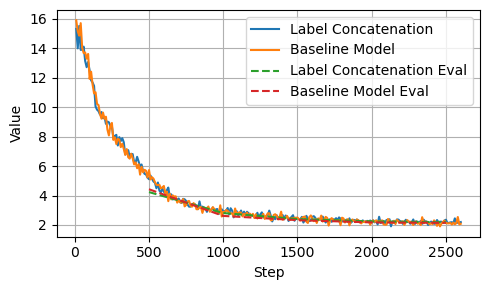

In [27]:
plt.figure(figsize=(5, 3))

# Plot data from each CSV file
# for file, data in losses_data.items():
#     plt.plot(data['Step'], data['Value'], label=file.split('.')[0])

plt.plot(losses_data['label_concat_20240608_153342.csv']['Step'], losses_data['label_concat_20240608_153342.csv']['Value'], label='Label Concatenation Trainig')
plt.plot(losses_data['text_only_20240608_141256.csv']['Step'], losses_data['text_only_20240608_141256.csv']['Value'], label='Baseline Model Training')

# Include the eval steps
plt.plot(eval_data['label_concat_20240608_153342.csv']['Step'], eval_data['label_concat_20240608_153342.csv']['Value'], label='Label Concatenation Eval', linestyle='--')
plt.plot(eval_data['text_only_20240608_141256.csv']['Step'], eval_data['text_only_20240608_141256.csv']['Value'], label='Baseline Model Eval', linestyle='--')

plt.xlabel('Step')
plt.ylabel('Value')
# plt.title('Losses Comparison')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('T5_losses_comparison.pdf')
plt.show()



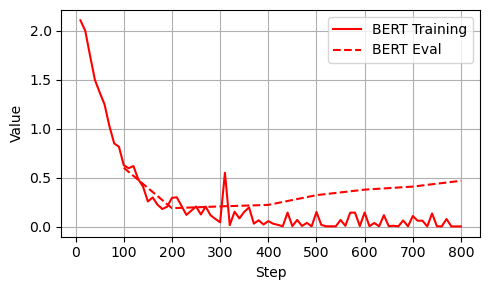

In [31]:
plt.figure(figsize=(5, 3))


plt.plot(losses_data['logs_order_20240609_142648.csv']['Step'], losses_data['logs_order_20240609_142648.csv']['Value'], color='red', label='BERT Training')
plt.plot(eval_data['logs_order_20240609_142648.csv']['Step'], eval_data['logs_order_20240609_142648.csv']['Value'], linestyle='--', color='red', label='BERT Eval')

plt.xlabel('Step')
plt.ylabel('Value')
# plt.title('Bert Training Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('BERT_Loss.pdf')
plt.show()